# Kernel PCA

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\NIRMALYA\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
data_set = pd.read_csv("Social_Network_Ads.csv")
data_set

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [3]:
data_set.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
X = data_set.iloc[:, [2,3]].values

In [5]:
X

array([[1.90e+01, 1.90e+04],
       [3.50e+01, 2.00e+04],
       [2.60e+01, 4.30e+04],
       [2.70e+01, 5.70e+04],
       [1.90e+01, 7.60e+04],
       [2.70e+01, 5.80e+04],
       [2.70e+01, 8.40e+04],
       [3.20e+01, 1.50e+05],
       [2.50e+01, 3.30e+04],
       [3.50e+01, 6.50e+04],
       [2.60e+01, 8.00e+04],
       [2.60e+01, 5.20e+04],
       [2.00e+01, 8.60e+04],
       [3.20e+01, 1.80e+04],
       [1.80e+01, 8.20e+04],
       [2.90e+01, 8.00e+04],
       [4.70e+01, 2.50e+04],
       [4.50e+01, 2.60e+04],
       [4.60e+01, 2.80e+04],
       [4.80e+01, 2.90e+04],
       [4.50e+01, 2.20e+04],
       [4.70e+01, 4.90e+04],
       [4.80e+01, 4.10e+04],
       [4.50e+01, 2.20e+04],
       [4.60e+01, 2.30e+04],
       [4.70e+01, 2.00e+04],
       [4.90e+01, 2.80e+04],
       [4.70e+01, 3.00e+04],
       [2.90e+01, 4.30e+04],
       [3.10e+01, 1.80e+04],
       [3.10e+01, 7.40e+04],
       [2.70e+01, 1.37e+05],
       [2.10e+01, 1.60e+04],
       [2.80e+01, 4.40e+04],
       [2.70e+

In [6]:
y = data_set.iloc[:, -1].values

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

### Splititng Into Training And Testing Test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

In [10]:
print(X_train, X_test, y_train, y_test)

[[1.90e+01 7.60e+04]
 [3.70e+01 5.20e+04]
 [3.50e+01 5.30e+04]
 [4.50e+01 2.20e+04]
 [3.60e+01 1.25e+05]
 [3.90e+01 7.70e+04]
 [3.50e+01 5.00e+04]
 [4.20e+01 6.40e+04]
 [4.20e+01 7.30e+04]
 [3.50e+01 3.80e+04]
 [2.20e+01 2.70e+04]
 [5.80e+01 4.70e+04]
 [3.70e+01 1.46e+05]
 [2.90e+01 1.48e+05]
 [2.40e+01 2.30e+04]
 [2.80e+01 8.50e+04]
 [2.10e+01 8.80e+04]
 [3.20e+01 1.17e+05]
 [4.70e+01 4.30e+04]
 [4.70e+01 2.50e+04]
 [4.00e+01 5.90e+04]
 [3.30e+01 6.90e+04]
 [4.20e+01 1.08e+05]
 [3.10e+01 8.90e+04]
 [4.70e+01 1.44e+05]
 [4.80e+01 3.50e+04]
 [2.20e+01 5.50e+04]
 [3.60e+01 7.50e+04]
 [4.10e+01 7.90e+04]
 [2.90e+01 8.30e+04]
 [1.90e+01 2.60e+04]
 [2.70e+01 1.70e+04]
 [2.70e+01 8.80e+04]
 [3.30e+01 1.49e+05]
 [2.40e+01 8.40e+04]
 [4.50e+01 2.20e+04]
 [4.20e+01 9.00e+04]
 [4.00e+01 5.70e+04]
 [4.70e+01 4.90e+04]
 [3.70e+01 9.30e+04]
 [2.10e+01 6.80e+04]
 [3.70e+01 1.37e+05]
 [5.90e+01 1.30e+05]
 [2.90e+01 4.30e+04]
 [4.80e+01 1.31e+05]
 [4.00e+01 6.00e+04]
 [6.00e+01 8.30e+04]
 [3.60e+01 6.

### Feature Scalling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.fit_transform(X_test)   #sc_X.transform(X_test)

In [12]:
X_train

array([[-1.85828718,  0.19391527],
       [-0.04006816, -0.51806328],
       [-0.2420925 , -0.4883975 ],
       [ 0.76802918, -1.40803646],
       [-0.14108033,  1.64753813],
       [ 0.16195618,  0.22358104],
       [-0.2420925 , -0.57739482],
       [ 0.46499268, -0.162074  ],
       [ 0.46499268,  0.10491795],
       [-0.2420925 , -0.93338409],
       [-1.55525068, -1.25970759],
       [ 2.08118737, -0.66639214],
       [-0.04006816,  2.27051936],
       [-0.8481655 ,  2.3298509 ],
       [-1.35322634, -1.37837068],
       [-0.94917767,  0.46090722],
       [-1.65626285,  0.54990454],
       [-0.545129  ,  1.41021195],
       [ 0.97005352, -0.78505523],
       [ 0.97005352, -1.31903914],
       [ 0.26296834, -0.31040287],
       [-0.44411683, -0.01374514],
       [ 0.46499268,  1.14321999],
       [-0.64614117,  0.57957031],
       [ 0.97005352,  2.21118781],
       [ 1.07106569, -1.02238141],
       [-1.55525068, -0.42906596],
       [-0.14108033,  0.16424949],
       [ 0.36398051,

In [14]:
X_test

array([[-0.28618622, -0.38737066],
       [-1.20398458, -0.44442083],
       [-0.03587757,  0.01198054],
       [-0.7868035 ,  0.35428156],
       [-0.95367593, -1.44279883],
       [ 1.79971915, -0.81524695],
       [-0.7868035 ,  0.12608088],
       [-1.03711215, -1.58542426],
       [-0.61993107, -0.35884558],
       [ 1.38253807,  1.55233516],
       [-0.61993107, -0.07359472],
       [ 0.79848457,  1.38118464],
       [-1.370857  , -0.21622015],
       [ 0.71504836, -1.44279883],
       [-1.03711215,  0.04050562],
       [ 0.04755864,  0.06903071],
       [-0.95367593,  1.89463619],
       [ 0.63161214, -1.38574866],
       [-1.03711215, -1.52837409],
       [-0.87023972, -0.44442083],
       [-1.53772943,  0.43985682],
       [ 1.63284672,  0.69658259],
       [-1.03711215,  0.43985682],
       [ 0.13099486,  0.21165614],
       [-1.53772943,  0.32575648],
       [-0.20275   , -0.52999609],
       [ 0.29786729,  0.12608088],
       [-0.70336729,  1.83758601],
       [ 0.29786729,

### Applying Kernel PCA

In [15]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

### Fitting Logistic Regression To Traing Data Set

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting

In [18]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

In [19]:
y_test

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0], dtype=int64)

### Making Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58  0]
 [ 7 35]]


### Visualizing Training Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


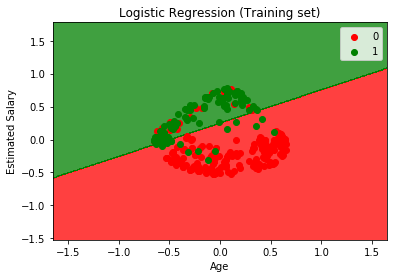

In [22]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizing Test Set

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


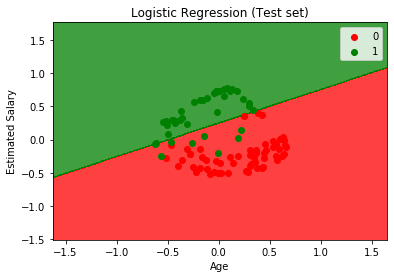

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# END